In [5]:
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import boto3
from dotenv import load_dotenv
import mlflow

pd.set_option('display.max_info_columns', 1000)
pd.set_option('display.max_columns', 50)  
pd.set_option('display.max_rows', 50)

load_dotenv()

True

In [3]:
yadisk_url = "https://disk.yandex.com/d/Io0siOESo2RAaA"

def get_direct_download_url(public_url):
    """
    Получение прямой ссылки на скачивание через API Яндекс Диска.
    """
    api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
    response = requests.get(api_url, params={'public_key': public_url})
    response.raise_for_status()
    return response.json()["href"]

def download_file(url, filename):
    """
    Скачивание файла по прямой ссылке.
    """
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

def extract_zip(archive_path, extract_to='.'):
    """
    Распаковка ZIP архива.
    """
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def main():
    archive_name = "archive.zip"
    
    print("Получение прямой ссылки...")
    direct_url = get_direct_download_url(yadisk_url)

    print("Скачивание архива...")
    download_file(direct_url, archive_name)

    print("Распаковка архива...")
    extract_zip(archive_name, extract_to='./data')

    print("Готово!")

if __name__ == "__main__":
    main()


Получение прямой ссылки...
Скачивание архива...
Распаковка архива...
Готово!


In [4]:
df = pd.read_csv("data/train_ver2.csv")
df.head()

/tmp/ipykernel_4922/2902728405.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/train_ver2.csv")


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
display(df.iloc[:,:20].info(verbose=True, show_counts=True))
display(df.iloc[:,20:40].info(verbose=True, show_counts=True))
display(df.iloc[:,40:].info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 20 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   fecha_dato       13647309 non-null  object 
 1   ncodpers         13647309 non-null  int64  
 2   ind_empleado     13619575 non-null  object 
 3   pais_residencia  13619575 non-null  object 
 4   sexo             13619505 non-null  object 
 5   age              13647309 non-null  object 
 6   fecha_alta       13619575 non-null  object 
 7   ind_nuevo        13619575 non-null  float64
 8   antiguedad       13647309 non-null  object 
 9   indrel           13619575 non-null  float64
 10  ult_fec_cli_1t   24793 non-null     object 
 11  indrel_1mes      13497528 non-null  object 
 12  tiprel_1mes      13497528 non-null  object 
 13  indresi          13619575 non-null  object 
 14  indext           13619575 non-null  object 
 15  conyuemp         1808 non-null      object 
 16

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 20 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   nomprov                13553718 non-null  object 
 1   ind_actividad_cliente  13619575 non-null  float64
 2   renta                  10852934 non-null  float64
 3   segmento               13457941 non-null  object 
 4   ind_ahor_fin_ult1      13647309 non-null  int64  
 5   ind_aval_fin_ult1      13647309 non-null  int64  
 6   ind_cco_fin_ult1       13647309 non-null  int64  
 7   ind_cder_fin_ult1      13647309 non-null  int64  
 8   ind_cno_fin_ult1       13647309 non-null  int64  
 9   ind_ctju_fin_ult1      13647309 non-null  int64  
 10  ind_ctma_fin_ult1      13647309 non-null  int64  
 11  ind_ctop_fin_ult1      13647309 non-null  int64  
 12  ind_ctpp_fin_ult1      13647309 non-null  int64  
 13  ind_deco_fin_ult1      13647309 non-null  int64  
 14  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column             Non-Null Count     Dtype  
---  ------             --------------     -----  
 0   ind_pres_fin_ult1  13647309 non-null  int64  
 1   ind_reca_fin_ult1  13647309 non-null  int64  
 2   ind_tjcr_fin_ult1  13647309 non-null  int64  
 3   ind_valo_fin_ult1  13647309 non-null  int64  
 4   ind_viv_fin_ult1   13647309 non-null  int64  
 5   ind_nomina_ult1    13631246 non-null  float64
 6   ind_nom_pens_ult1  13631246 non-null  float64
 7   ind_recibo_ult1    13647309 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 833.0 MB


None

In [6]:
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'], format='%Y-%m-%d')
df['fecha_dato'].describe()

count                         13647309
mean     2015-10-19 22:37:34.242196736
min                2015-01-28 00:00:00
25%                2015-06-28 00:00:00
50%                2015-10-28 00:00:00
75%                2016-02-28 00:00:00
max                2016-05-28 00:00:00
Name: fecha_dato, dtype: object

In [7]:
missing_info = (
    df.isnull()
      .sum()
      .to_frame(name='missing_count')
      .assign(missing_fraction=lambda x: x['missing_count'] / len(df))
      .query('missing_count > 0')
      .sort_values(by='missing_count', ascending=False)
)
display(missing_info)


,missing_count,missing_fraction
conyuemp,13645501,0.999868
ult_fec_cli_1t,13622516,0.998183
renta,2794375,0.204756
segmento,189368,0.013876
canal_entrada,186126,0.013638
indrel_1mes,149781,0.010975
tiprel_1mes,149781,0.010975
cod_prov,93591,0.006858
nomprov,93591,0.006858
sexo,27804,0.002037


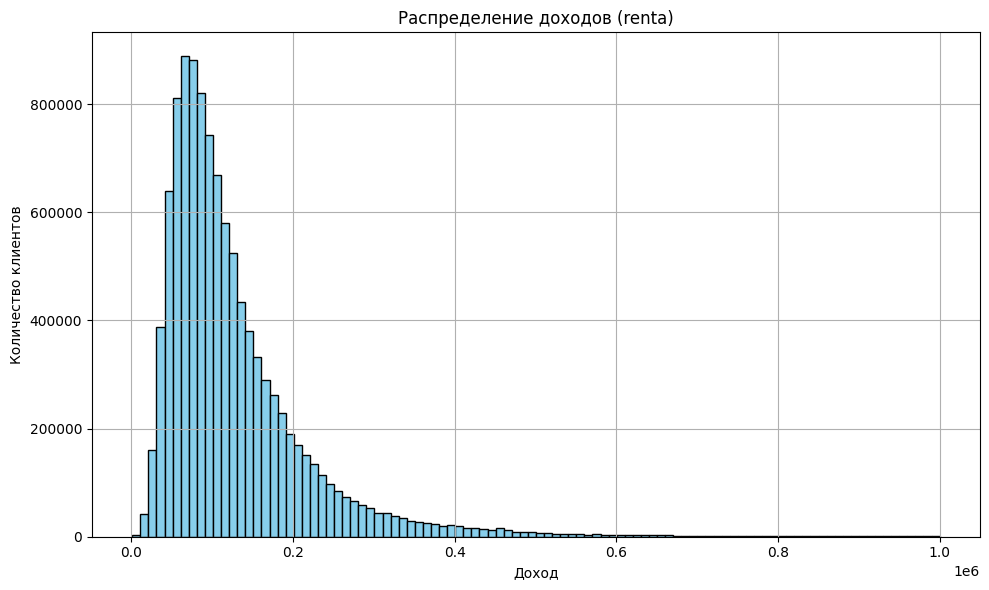

0


In [8]:
# Перед заполнением пропусков, дополнительно исследуем столбец renta

renta_clean = df['renta'].dropna()
renta_filtered = renta_clean[renta_clean < 1_000_000]

plt.figure(figsize=(10, 6))
plt.hist(renta_filtered, bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение доходов (renta)')
plt.xlabel('Доход')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.tight_layout()
plt.show()

print(len(df.loc[df.renta == 0]))

In [9]:
df['age'] = df['age'].replace(' NA', np.nan)
df.dropna(subset='age', inplace=True)
df['age'] = df['age'].astype(int)
df = df.loc[(df['age'] >= 18) & (df['age'] <= 100)]

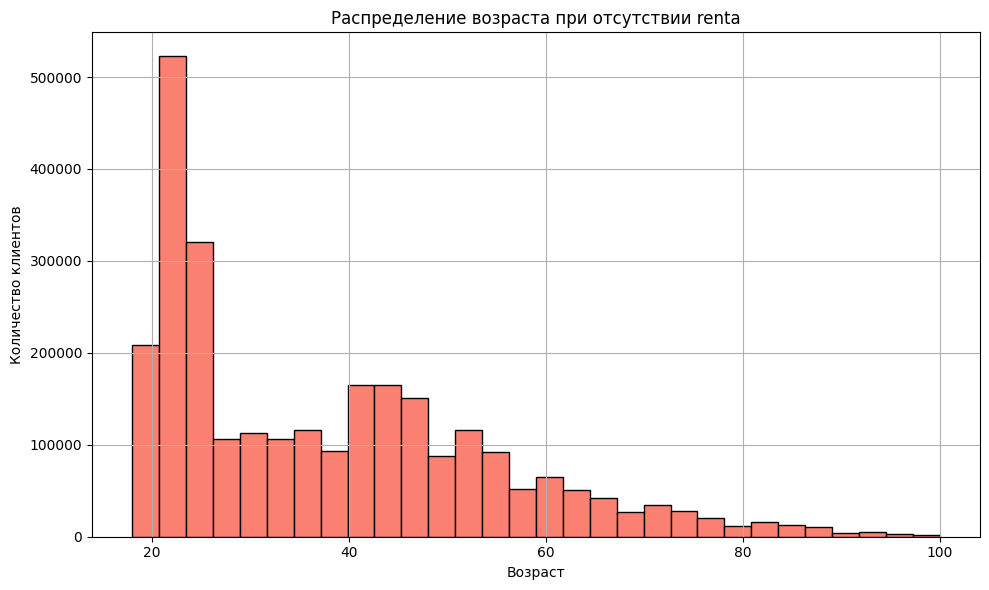

In [10]:
# Фильтрация: только строки, где renta отсутствует
age_missing_renta = df[df['renta'].isna()]['age'].dropna().astype(float)

plt.figure(figsize=(10, 6))
plt.hist(age_missing_renta, bins=30, color='salmon', edgecolor='black')
plt.title('Распределение возраста при отсутствии renta')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Заполним пропуски:
# conyuemp - заполним 0
# renta - заполним исходя из медианной зарпалаты в зависимости от возраста
# segmento, canal_entrada - самым частым классом
# остальные - просто удалим, их не много

In [11]:
df['conyuemp'] = df['conyuemp'].fillna(0)

bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

df['age_group'] = pd.cut(df['age'].astype(float), bins=bins, labels=labels, right=False)

median_renta_by_age = df.groupby('age_group')['renta'].median()

def fill_renta(row):
    if pd.isna(row['renta']):
        return median_renta_by_age.get(row['age_group'], np.nan)
    else:
        return row['renta']

df['renta'] = df.apply(fill_renta, axis=1)

for col in ['segmento', 'canal_entrada']:
    most_frequent = df[col].mode(dropna=True)[0]
    df[col] = df[col].fillna(most_frequent)

df.drop(columns=['age_group'], inplace=True)

/tmp/ipykernel_4922/867155631.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_renta_by_age = df.groupby('age_group')['renta'].median()


In [12]:
del median_renta_by_age, most_frequent, renta_clean, renta_filtered

In [13]:
# Столбец ult_fec_cli_1t (Последняя дата, когда клиент был премиальным) заполним разницей во времени между fecha_dato
df['ult_fec_cli_1t'] = pd.to_datetime(df["ult_fec_cli_1t"], format='%Y-%m-%d')
df['days_since_premium'] = (df['fecha_dato'] - df['ult_fec_cli_1t']).dt.days
# Заполним NaN значением 0 (никогда не был премиальным)
df['days_since_premium'] = df['days_since_premium'].fillna(0).astype(int)
df.drop(columns='ult_fec_cli_1t', inplace=True)

In [14]:
print(f"остается {len(df.dropna())/13647309} данных от первоначальных")

остается 0.9745520527160336 данных от первоначальных


In [18]:
df.to_pickle("data/df_1.pkl")

In [19]:
# Проверка на дублирование одного пользователя за месяц
df[df[["fecha_dato", "ncodpers"]].duplicated()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,days_since_premium


In [20]:
print(df.drop_duplicates("ncodpers")["ind_empleado"].value_counts())
# Почти все безработные. С такими данными - этот столбец бесполезен
df = df.drop(columns="ind_empleado")

ind_empleado
N    940781
B       219
F       152
A       148
S         1
Name: count, dtype: int64


In [21]:
print(df.drop_duplicates(["ncodpers"])["pais_residencia"].value_counts())
print(f" Отношение иностранцев и граждан {len(df.loc[df.pais_residencia != 'ES'])/len(df.loc[df.pais_residencia == 'ES'])}")

pais_residencia
ES    937317
FR       314
AR       289
DE       283
GB       277
       ...  
CD         1
BZ         1
ZW         1
DJ         1
JM         1
Name: count, Length: 116, dtype: int64
 Отношение иностранцев и граждан 0.004904080863132537


In [22]:
# Очень плохое соотношение - столбец удалим
df = df.drop(columns="pais_residencia")

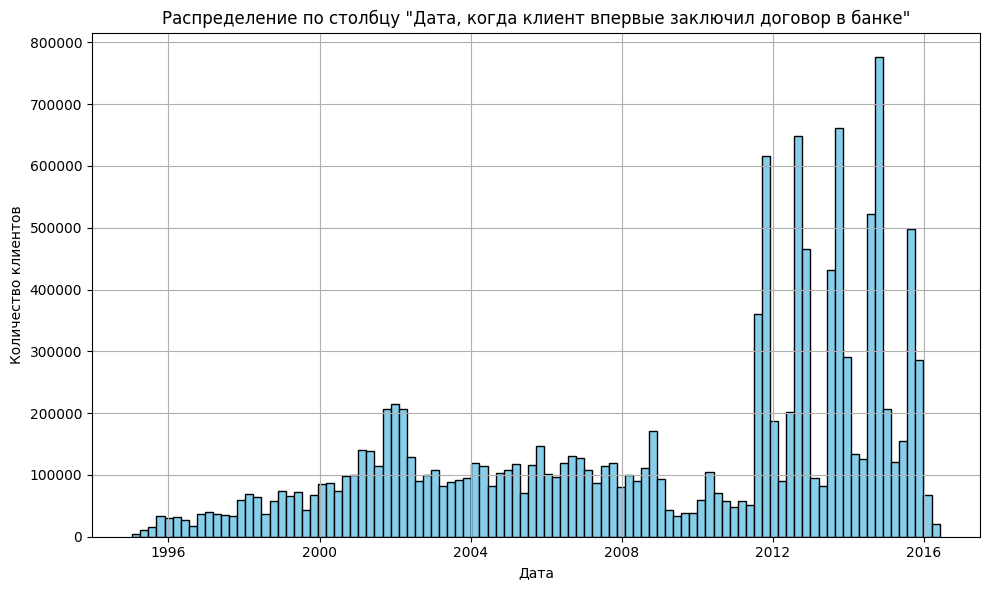

In [ ]:
df.fecha_alta = pd.to_datetime(df["fecha_alta"], format='%Y-%m-%d')

plt.figure(figsize=(10, 6))
plt.hist(df.fecha_alta, bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение по столбцу "Дата, когда клиент впервые заключил договор в банке"')
plt.xlabel('Дата')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.tight_layout()
plt.show()

Выбросы есть, и скорее всего обусловлены появлением мобильного банкинга

In [24]:
df.drop_duplicates("ncodpers")["ind_nuevo"].value_counts()

ind_nuevo
0.0    787527
1.0    153774
Name: count, dtype: int64

In [25]:
df["antiguedad"] = df["antiguedad"].astype(int)
print(df.drop_duplicates("ncodpers")["antiguedad"].describe())
print(f"Случаев записи неправильного стажа {len(df.loc[df.antiguedad < 0])}")
# нижняя граница явно определена неверно

df = df[df["antiguedad"] >= 0]

count    941301.000000
mean         67.389104
std        1459.270279
min     -999999.000000
25%          12.000000
50%          43.000000
75%         123.000000
max         250.000000
Name: antiguedad, dtype: float64
Случаев записи неправильного стажа 38


In [26]:
df.drop_duplicates("ncodpers")["indrel"].value_counts()
# Плохое соотношение - столбец удалим
df = df.drop(columns="indrel")

In [27]:
df.drop_duplicates("ncodpers")["indrel_1mes"].value_counts()
# Почти все премиальные в начале месяца - плохой признак
df = df.drop(columns="indrel_1mes")

In [28]:
print(df["tiprel_1mes"].value_counts())

# Кол-во значений в P, R, N < 0.1%
# Эти классы не имеют бизнес-ценности, логично отнести их к "I" (неактивным).

df['tiprel_1mes'] = df['tiprel_1mes'].replace({'P': 'I', 'R': 'I', 'N': 'I'})

tiprel_1mes
I    7265802
A    6095243
P       4643
R        867
N          2
Name: count, dtype: int64


In [29]:
print(df.drop_duplicates("ncodpers")["indresi"].value_counts())
# Плохое соотношени
df = df.drop(columns="indresi")

indresi
S    937315
N      3984
Name: count, dtype: int64


In [30]:
print(df.drop_duplicates("ncodpers")["conyuemp"].value_counts())
# Тоже самое
df = df.drop(columns="conyuemp")

conyuemp
0    941036
N       262
S         1
Name: count, dtype: int64


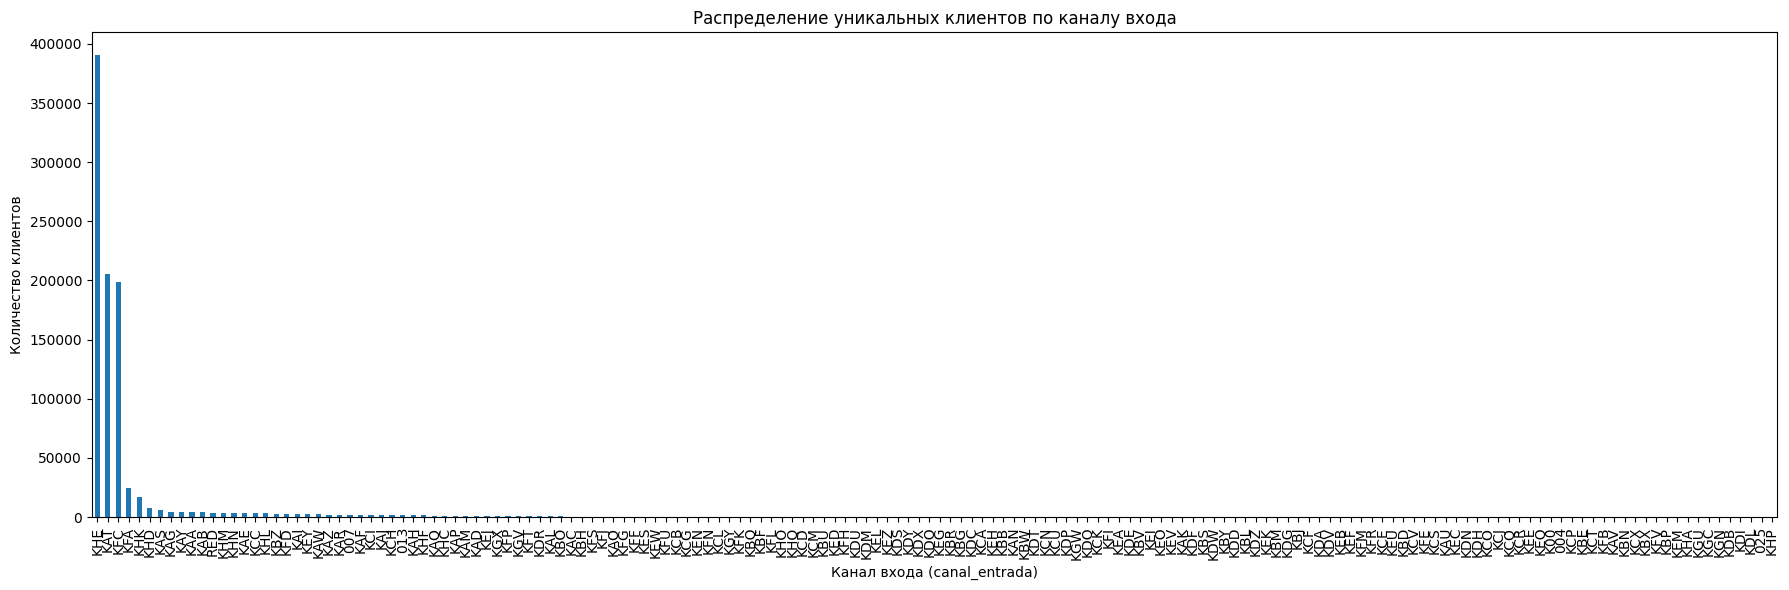

In [ ]:
df_unique = df.drop_duplicates(subset='ncodpers')

canal_counts = df_unique['canal_entrada'].value_counts()

plt.figure(figsize=(18, 6))
canal_counts.plot(kind='bar')
plt.title('Распределение уникальных клиентов по каналу входа')
plt.xlabel('Канал входа (canal_entrada)')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Хорошее распределение

In [32]:
print(df.drop_duplicates("ncodpers")["indfall"].value_counts())
# Почти все значения "N"
df = df.drop(columns="indfall")

indfall
N    939183
S      2116
Name: count, dtype: int64


In [33]:
print(df.drop_duplicates("ncodpers")["tipodom"].value_counts())
# Только один тип значения
df = df.drop(columns="tipodom")

tipodom
1.0    941298
Name: count, dtype: int64


In [35]:
print(df.drop_duplicates("ncodpers")["cod_prov"].value_counts())

cod_prov
28.0    299707
8.0      89977
46.0     48637
41.0     41115
15.0     29142
         ...  
1.0       2655
44.0      1566
42.0      1277
52.0       644
51.0       519
Name: count, Length: 52, dtype: int64


In [36]:
df.drop_duplicates(["ncodpers"], keep="last")["nomprov"].value_counts()

nomprov
MADRID       299760
BARCELONA     90049
VALENCIA      48636
SEVILLA       41098
CORUÑA, A     29132
              ...  
ALAVA          2655
TERUEL         1567
SORIA          1277
MELILLA         644
CEUTA           523
Name: count, Length: 52, dtype: int64

In [37]:
df["ind_actividad_cliente"].value_counts()

ind_actividad_cliente
0.0    7345552
1.0    6142320
Name: count, dtype: int64

In [38]:
# Видно, что неактивность за последний месяц не значит неактивность в принципе
df.loc[(df["ind_actividad_cliente"] == 0) & (df["tiprel_1mes"] == 'I')]

,fecha_dato,ncodpers,sexo,age,fecha_alta,ind_nuevo,antiguedad,tiprel_1mes,indext,canal_entrada,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,days_since_premium
1,2015-01-28,1050611,V,23,2012-08-10,0.0,35,I,S,KHE,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
2,2015-01-28,1050612,V,23,2012-08-10,0.0,35,I,N,KHE,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
3,2015-01-28,1050613,H,22,2012-08-10,0.0,35,I,N,KHD,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
5,2015-01-28,1050615,H,23,2012-08-10,0.0,35,I,N,KHE,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
6,2015-01-28,1050616,H,23,2012-08-10,0.0,35,I,N,KHE,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647302,2016-05-28,1166767,V,25,2013-08-14,0.0,33,I,S,KHE,50.0,ZARAGOZA,0.0,73134.81,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
13647303,2016-05-28,1166766,V,25,2013-08-14,0.0,33,I,N,KHE,50.0,ZARAGOZA,0.0,50945.25,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
13647304,2016-05-28,1166765,V,22,2013-08-14,0.0,33,I,N,KHE,50.0,ZARAGOZA,0.0,43912.17,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
13647305,2016-05-28,1166764,V,23,2013-08-14,0.0,33,I,N,KHE,26.0,"RIOJA, LA",0.0,23334.99,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0


In [39]:
print(df.drop_duplicates("ncodpers")["renta"].describe())

# Найдём 1-й и 99-й перцентили
lower, upper = df['renta'].quantile([0.01, 0.99])

# Ограничим значения в пределах [1%, 99%]
df['renta'] = df['renta'].clip(lower, upper)

count    9.412650e+05
mean     1.251731e+05
std      2.019961e+05
min      1.202730e+03
25%      7.859862e+04
50%      9.532332e+04
75%      1.317545e+05
max      2.889440e+07
Name: renta, dtype: float64


In [40]:
df.drop_duplicates("ncodpers")["segmento"].value_counts()
# Вроде все в пределах нормы

segmento
02 - PARTICULARES     636684
03 - UNIVERSITARIO    272386
01 - TOP               32229
Name: count, dtype: int64

In [41]:
df.to_pickle("data/df_1.pkl")

EDA

In [6]:
df = pd.read_pickle('data/df_1.pkl')

In [7]:
product_cols = df.columns[15:39]

# Посмотрим уникальные значения для каждого продуктового столбца
for col in product_cols:
    unique_vals = df[col].dropna().unique()
    if set(unique_vals) - {0, 1}:
        print(f"{col}: {unique_vals}")
        
# нет вывода - значит там только 0 и 1

In [8]:
product_usage_all = df[product_cols].sum() / df.shape[0]
product_usage_all = product_usage_all.sort_values(ascending=False)

df_unique_clients = df.sort_values('fecha_dato').drop_duplicates('ncodpers', keep='last')

# Доля пользователей, у которых есть продукт
product_usage_unique = df_unique_clients[product_cols].sum() / df_unique_clients.shape[0]
product_usage_unique = product_usage_unique.sort_values(ascending=False)

product_stats = pd.DataFrame({
    'Usage (All Records)': product_usage_all,
    'Usage (Unique Clients)': product_usage_unique
})
product_stats.sort_values('Usage (All Records)')


,Usage (All Records),Usage (Unique Clients)
ind_aval_fin_ult1,0.000023,0.000017
ind_ahor_fin_ult1,0.000104,0.000083
ind_cder_fin_ult1,0.000398,0.000336
ind_ctju_fin_ult1,0.001561,0.001257
ind_deme_fin_ult1,0.001680,0.001085
ind_deco_fin_ult1,0.001767,0.000338
ind_pres_fin_ult1,0.002558,0.002117
ind_viv_fin_ult1,0.003891,0.003145
ind_hip_fin_ult1,0.005937,0.004808
ind_plan_fin_ult1,0.009273,0.007816


In [9]:
# Копии датафрейма для групп
df_men = df[df['sexo'] == 'H']
df_women = df[df['sexo'] == 'V']
df_active = df[df['ind_actividad_cliente'] == 1]

# Средний возраст, учитывая только пользователей, у которых продукт = 1
avg_age_per_product = {
    col: df.loc[df[col] == 1, 'age'].astype(float).mean()
    for col in product_cols
}

product_stats = pd.DataFrame({
    'Usage (All Records)': df[product_cols].sum() / len(df),
    'Usage (Unique Clients)': df.drop_duplicates('ncodpers')[product_cols].sum() / df['ncodpers'].nunique(),
    'Usage by Men': df_men[product_cols].sum() / len(df_men),
    'Usage by Women': df_women[product_cols].sum() / len(df_women),
    'Usage by Active Clients': df_active[product_cols].sum() / len(df_active),
    'Average Age (Users)': pd.Series(avg_age_per_product)
})


In [10]:
product_stats.sort_values(by='Usage (All Records)', ascending=False)

,Usage (All Records),Usage (Unique Clients),Usage by Men,Usage by Women,Usage by Active Clients,Average Age (Users)
ind_cco_fin_ult1,0.662287,0.615159,0.682077,0.645807,0.755119,37.994269
ind_ctop_fin_ult1,0.130052,0.112347,0.106878,0.149355,0.193557,54.208430
ind_recibo_ult1,0.129350,0.102658,0.111988,0.143810,0.282217,44.113583
ind_ecue_fin_ult1,0.083619,0.063906,0.070855,0.094250,0.170676,48.351431
ind_cno_fin_ult1,0.081771,0.063298,0.073649,0.088537,0.177265,44.132745
ind_nom_pens_ult1,0.060014,0.046914,0.054569,0.064549,0.131375,45.061387
ind_nomina_ult1,0.055283,0.042302,0.050342,0.059400,0.121041,43.253607
ind_reca_fin_ult1,0.052372,0.038943,0.039884,0.062774,0.107261,47.168552
ind_tjcr_fin_ult1,0.044893,0.038140,0.034142,0.053849,0.098027,48.189366
ind_ctpp_fin_ult1,0.043771,0.038316,0.037179,0.049262,0.079161,49.637083


In [11]:
# Добавим количество продуктов у пользователя
df["prod_count"] = df[product_cols].sum(axis=1)

# Подсчёт пользователей без продуктов ("холодных") на всех данных
cold_users_total = (df["prod_count"] == 0).sum()
print(f"Общее число холодных пользователей: {cold_users_total}")

# Подсчёт "холодных" в последнем месяце для каждого клиента
df_last = df.sort_values("fecha_dato").drop_duplicates("ncodpers", keep="last")
cold_users_last = (df_last["prod_count"] == 0).sum()
print(f"Холодные пользователи в последнем месяце: {cold_users_last}")


Общее число холодных пользователей: 2535072
Холодные пользователи в последнем месяце: 250654


In [12]:
# Группировка по месяцу и подсчёт оформлений по каждому продукту
monthly_product_counts = df.groupby("fecha_dato")[product_cols].sum()

# Выводим результат
monthly_product_counts


,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-28,88,19,485057,300,58572,1505,8235,105709,36052,1405,1618,35901,59932,13825,4958,7414,2079,36579,35532,20201,3223,38910.0,43225.0,95239
2015-02-28,89,20,486341,300,59872,1453,8078,105412,35921,1921,1594,35536,60780,14125,4951,7394,2074,36791,34291,20147,3212,40689.0,44733.0,94287
2015-03-28,89,21,487289,313,60809,1405,7776,105135,35760,2284,1559,34844,61737,14515,4940,7374,2074,37007,34950,19983,3190,42922.0,44052.0,97048
2015-04-28,87,21,487818,313,62124,1357,7436,104734,35594,2371,1512,34863,62520,14835,4922,7360,2079,37882,35956,19914,3171,42413.0,46547.0,98207
2015-05-28,85,21,488955,313,63322,1306,7084,104594,35472,2055,1476,35068,63503,15056,4759,7354,2076,38222,35860,19939,3154,41370.0,42434.0,96421
2015-06-28,83,21,493706,316,59837,1244,6920,104304,35326,1803,1444,35055,64084,15028,4718,7354,2039,41161,36546,19667,3138,43518.0,47684.0,98641
2015-07-28,82,19,503601,320,61602,1188,6938,103993,35129,1845,1396,34969,64469,15000,4704,7344,2023,41753,37156,19691,3128,44931.0,49562.0,99970
2015-08-28,82,19,514522,323,62992,1163,6993,103754,34995,1909,1378,34917,64784,15051,4690,7345,2022,41995,36817,19941,3108,42783.0,47039.0,96037
2015-09-28,81,19,529297,319,63754,1155,7180,103374,34780,1982,1362,35051,65061,15034,4679,7342,2023,42241,36245,20147,3090,43667.0,47976.0,100718


In [13]:
# Папка для сохранения графиков
ASSETS_DIR = "assets"
os.makedirs(ASSETS_DIR, exist_ok=True)

# Сортировка продуктов по популярности (сумма по всем месяцам)
product_totals = monthly_product_counts.sum().sort_values(ascending=False)
sorted_products = product_totals.index.tolist()

# Построение графиков по 4 продукта на каждом
num_plots = len(sorted_products) // 4 + int(len(sorted_products) % 4 > 0)

for i in range(num_plots):
    products_chunk = sorted_products[i*4:(i+1)*4]
    ax = monthly_product_counts[products_chunk].plot(figsize=(12, 6), marker='o')
    plt.title(f"Оформления продуктов ({i*4+1}–{i*4+len(products_chunk)})")
    plt.xlabel("Месяц")
    plt.ylabel("Количество оформлений")
    plt.grid(True)
    plt.legend(title="Продукты")
    plt.tight_layout()
    
    filename = os.path.join(ASSETS_DIR, f"product_trends_{i+1}.png")
    plt.savefig(filename)
    plt.close()


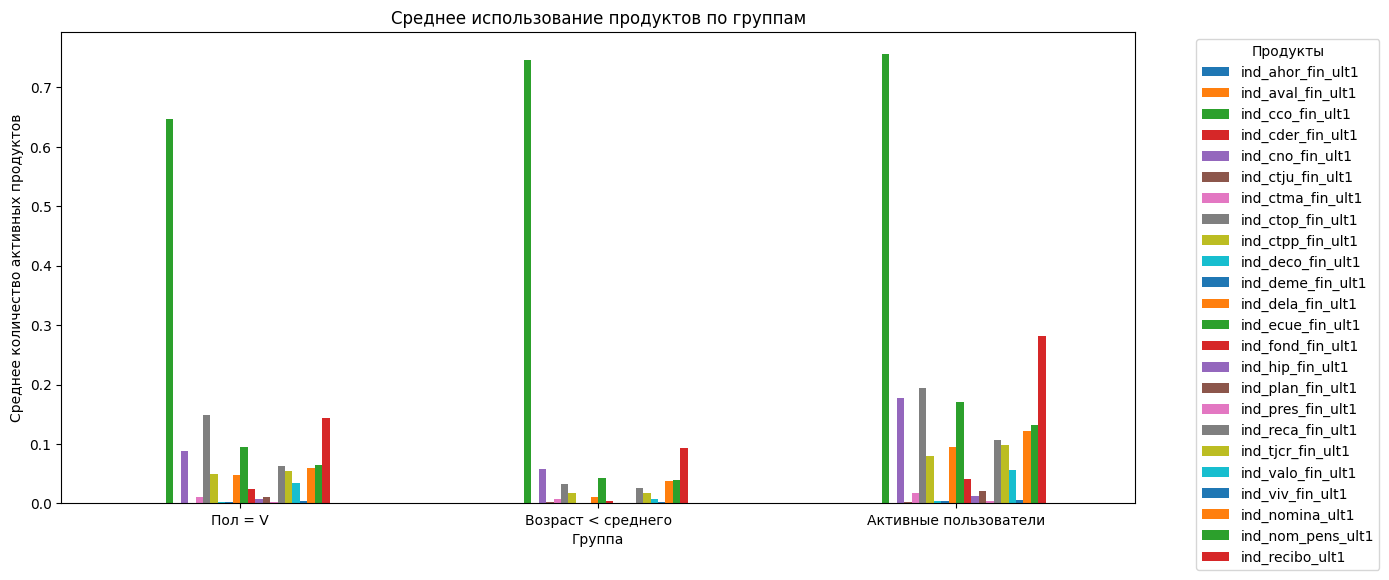

In [14]:
# Определим фильтры
most_common_gender = df["sexo"].mode()[0]
mean_age = df["age"].mean()
is_younger = df["age"] < mean_age
is_active = df["ind_actividad_cliente"] == 1

# Среднее использование продуктов в каждой группе
usage_by_gender = df[df["sexo"] == most_common_gender][product_cols].mean()
usage_by_young = df[is_younger][product_cols].mean()
usage_by_active = df[is_active][product_cols].mean()

# Объединим в один датафрейм
group_usage = pd.DataFrame({
    f"Пол = {most_common_gender}": usage_by_gender,
    "Возраст < среднего": usage_by_young,
    "Активные пользователи": usage_by_active
})

# Транспонируем для построения
group_usage = group_usage.T

# Построим график
ax = group_usage.plot(kind="bar", figsize=(14, 6))
plt.title("Среднее использование продуктов по группам")
plt.xlabel("Группа")
plt.ylabel("Среднее количество активных продуктов")
plt.xticks(rotation=0)
plt.legend(title="Продукты", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Сохраняем график
group_usage_path = os.path.join(ASSETS_DIR, "group_product_usage.png")
plt.savefig(group_usage_path)
plt.close()

In [11]:
top_products = product_cols[:6]

for prod in top_products:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[prod], y=df["renta"])
    plt.title(f"Распределение дохода по продукту {prod}")
    plt.xlabel("Продукт активен (1) / неактивен (0)")
    plt.ylabel("Доход (renta)")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[prod], y=df["age"])
    plt.title(f"Распределение возраста по продукту {prod}")
    plt.xlabel("Продукт активен (1) / неактивен (0)")
    plt.ylabel("Возраст")
    
    plt.tight_layout()
    save_path = os.path.join(ASSETS_DIR, f"{prod}_income_age_boxplot.png")
    plt.savefig(save_path)
    plt.close()


In [15]:
# Группируем по активности, считаем среднее по продуктам
usage_by_activity = df.groupby("ind_actividad_cliente")[product_cols].mean()

# Транспонируем для удобства построения графика
usage_by_activity = usage_by_activity.T

# Построим grouped bar chart
ax = usage_by_activity.plot(kind="bar", figsize=(14,6))
plt.title("Среднее использование продуктов у активных и неактивных клиентов")
plt.xlabel("Продукты")
plt.ylabel("Среднее значение (доля клиентов с продуктом)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Активность клиента", labels=["Неактивный (0)", "Активный (1)"])
plt.tight_layout()

save_path = os.path.join(ASSETS_DIR, "product_usage_by_activity.png")
plt.savefig(save_path)
plt.close()

In [16]:
# Отсортируем по клиенту и дате
df_sorted = df.sort_values(['ncodpers', 'fecha_dato'])

# Создадим колонку с предыдущим статусом для каждого клиента
df_sorted['prev_tiprel'] = df_sorted.groupby('ncodpers')['tiprel_1mes'].shift(1)

# Оставим только строки, где предыдущий статус есть (т.е. есть переход)
transitions = df_sorted.dropna(subset=['prev_tiprel'])

# Построим таблицу переходов: сколько раз из prev_tiprel перешли в tiprel_1mes
transition_matrix = pd.crosstab(transitions['prev_tiprel'], transitions['tiprel_1mes'])

# Нормируем по строкам, чтобы получить вероятности переходов
transition_probs = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

# Визуализируем heatmap
plt.figure(figsize=(8,6))
sns.heatmap(transition_probs, annot=True, fmt=".2f", cmap="Blues")
plt.title("Матрица вероятностей переходов статусов tiprel_1mes за месяц")
plt.ylabel("Статус в прошлом месяце")
plt.xlabel("Статус в текущем месяце")
plt.tight_layout()

save_path = os.path.join(ASSETS_DIR, "tiprel_1mes_transition_heatmap.png")
plt.savefig(save_path)
plt.close()

In [14]:
df.to_parquet("data/df_clean.parquet")
monthly_product_counts.to_parquet("data/monthly_product_counts.parquet")

In [17]:
AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
S3_SERVICE_NAME = "s3"
S3_ENDPOINT_URL = os.environ.get("S3_ENDPOINT_URL")
BUCKET_NAME = os.environ.get("S3_BUCKET_NAME")

session = boto3.session.Session()

s3 = session.client(
    service_name=S3_SERVICE_NAME,
    endpoint_url=S3_ENDPOINT_URL,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)

df_clean = "final_project/data/df_clean_parquet/"
s3.upload_file("data/df_clean.parquet", BUCKET_NAME, df_clean)

monthly_product_counts = "final_project/data/monthly_product_counts/"
s3.upload_file("data/monthly_product_counts.parquet", BUCKET_NAME, monthly_product_counts)

In [ ]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "final_project_1"
RUN_NAME = "EDA"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = os.getenv("S3_ENDPOINT_URL")
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID")
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY")

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifact(ASSETS_DIR)
    mlflow.log_artifact("main.ipynb")
    mlflow.log_artifact("data/df_clean.parquet")
    mlflow.log_artifact("data/monthly_product_counts.parquet")

🏃 View run EDA at: http://127.0.0.1:5000/#/experiments/3/runs/d0c1475b656a4193a3912f59661ac502
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3


: 

Выводы по результатам обработки данных и анализа

1. Предобработка данных

Поля fecha_dato, fecha_alta и ult_fec_cli_1t приведены к типу datetime.

Обработка пропущенных значений выполнена следующим образом:

Поле conyuemp: пропуски заполнены значением 0.

Поле renta: пропуски заполнены медианными значениями, рассчитанными по соответствующим возрастным группам.

Поля segmento и canal_entrada: пропущенные значения заменены наиболее частой категорией (модой).

Поле ult_fec_cli_1t преобразовано в числовой признак, представляющий количество дней с указанной даты. Отсутствующие даты интерпретированы как 0.

В поле age значения ' NA' заменены на np.nan. Выполнена коррекция и удаление некорректных значений возраста.

Данные отфильтрованы по критерию приемлемого возраста (18 < age < 100).

Для сглаживания экстремальных значений в поле renta применены методы обрезки (1–99 перцентили) и, при необходимости, логарифмирования.

2. Анализ признаков

Построены и проанализированы гистограммы распределения признаков renta и age с учетом ранее существовавших пропусков.

Проведен анализ распределения каналов привлечения (canal_entrada) среди уникальных клиентов.

Выявлены аномальные значения в поле fecha_alta, потенциально связанные с развитием цифровых каналов взаимодействия. Принято решение сохранить данные для последующего углубленного анализа.

Для поля tiprel_1mes рассмотрена возможность объединения редких категорий (P, R, N) с категорией неактивных клиентов (I) на основе логического соответствия статусов.

3. Анализ продуктовых показателей

Определен набор бинарных признаков, соответствующих продуктам (product_cols), где значение 1 указывает на наличие продукта у клиента, 0 — на отсутствие.

Установлено, что подавляющее большинство значений в данных признаках соответствует бинарной схеме. Значительные пропуски или ошибки в данных не обнаружены.

Рассчитаны следующие метрики по каждому продукту:

Доля клиентов, владеющих продуктом, относительно общего количества записей.

Доля уникальных клиентов, владеющих продуктом.

Доли владения продуктом отдельно среди мужчин, женщин и клиентов с активным статусом.

Средний возраст клиентов, владеющих продуктом.


Все данные сохранены в mlflow